In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer

In [29]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
pd.__version__

'2.2.2'

In [4]:
df = pd.read_parquet("./data/green_tripdata_2024-01.parquet")

In [5]:
df['lpep_pickup_datetime'] =pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] =pd.to_datetime(df['lpep_dropoff_datetime'])

In [6]:
df['duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']

In [7]:
df['duration'] = df['duration'].apply(lambda td: td.total_seconds()/60)

In [8]:
df = df[(df['duration'] >= 1) & (df['duration'] <= 60)]

In [9]:
categorical = ['PULocationID','DOLocationID']
numerical = ['trip_distance']

In [10]:
df[categorical] = df[categorical].astype(str)

In [11]:
train_dict = df[categorical + numerical].to_dict(orient='records')

In [12]:
dv = DictVectorizer()
x_train = dv.fit_transform(train_dict)

In [13]:
x_train

<54373x449 sparse matrix of type '<class 'numpy.float64'>'
	with 163119 stored elements in Compressed Sparse Row format>

In [14]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',
 'DOLocationID=148',

In [15]:
target = 'duration'
y_train = df[target].values

In [16]:
y_train

array([11.5       , 20.86666667, 19.03333333, ...,  4.        ,
        6.        , 31.        ])

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
y_pred = lr.predict(x_train)

In [20]:
y_pred

array([10.83670091, 26.19138438, 14.74817784, ..., 27.39585639,
        8.36547539, 22.7543219 ])

/tmp/ipykernel_3767/437147669.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_3767/437147669.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


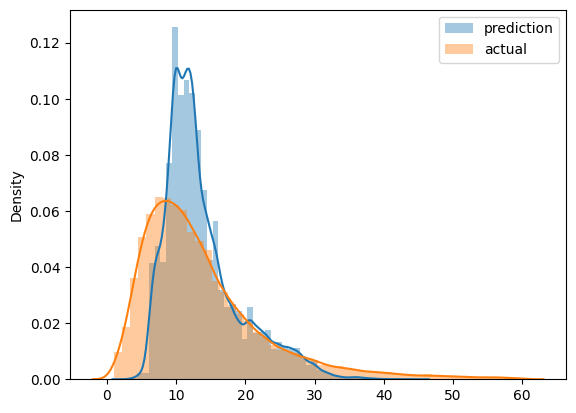

In [33]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()


In [32]:
mean_squared_error(y_train, y_pred, squared=False)

/opt/conda/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.1228220948023795